In [2]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt


## Inversionsmethod

In [9]:
def dichte_funktion(x: float):
    # dichte funktion f(x) = e^(1-x)
    return math.exp(1-x)

def verteilung_funktion(x: float):
    # verteilungs funktion F(x) = 1-e^(1-x)
    return 1 - math.exp(1-x)

def inversions_funtkion(x: float):
    # umkehrfunktion F^-1(x) = 1-ln(1-x)
    return 1 - math.log(1 - x)

In [28]:
n = 100
U = [random.uniform(0, 1) for _ in range(n)]

x = [x for x in np.linspace(0, 1, n)]
fX = [dichte_funktion(x) for x in x]

fU = [dichte_funktion(x) for x in U]

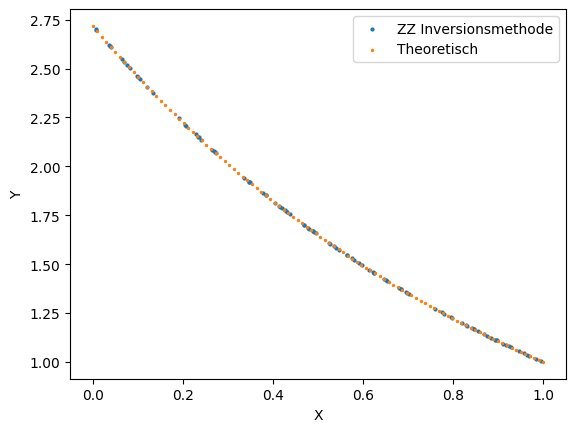

In [29]:
plt.scatter(U, fU, s=4, label="ZZ Inversionsmethode")
plt.scatter(x, fX, label="Theoretisch", s=2 )
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

## Annahme-Verwerfungs-Methode

In [1]:
def dichte_funktion(x: float) -> float:
    if x >= 3 and x <=7:
        return 1/(x * (math.log(7) - math.log(3)))
    else:
        ValueError("Only values between 3 and 7 are allowed")

In [ ]:
dichte_funktion(3)

In [27]:
def zz_generator(N):
    k = 1
    x_values = []
    y_values = []
    while k <= N:
        Q = random.uniform(3, 7)
        Y = random.uniform(0, dichte_funktion(3))
        
        if Y <= dichte_funktion(x=Q):
            x_values.append(Q)
            y_values.append(Y)
            k = k + 1
        
    return x_values, y_values
        

In [43]:
x, y = zz_generator(1000)

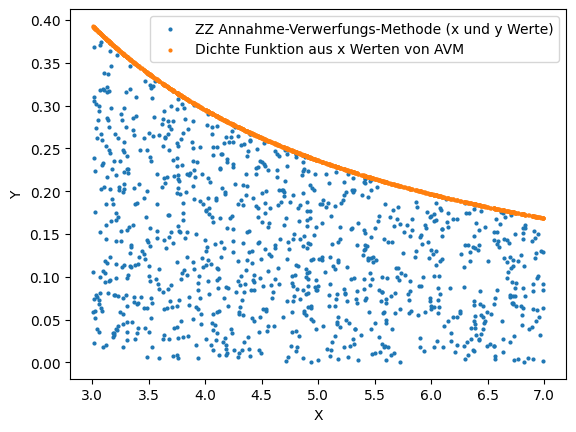

In [46]:
plt.scatter(x, y, s=4, label="ZZ Annahme-Verwerfungs-Methode (x und y Werte)")
plt.scatter(x, [dichte_funktion(x) for x in x], s=4, label="Dichte Funktion aus x Werten von AVM")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()